<a href="https://colab.research.google.com/github/Jessica1842553/MCDaa2025/blob/main/T8_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea 8/9 - Jessica Lizeth Hernández Bracho
### **Métricas de Desempeño y Diseño de Experimentos.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [2]:
df = pd.read_csv('/content/student-mat.csv', sep=";")

In [3]:
# Modificando columnas - convertir 'yes'/'no' a 1/0
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})

In [4]:
# Variables de Interés
x = df[['studytime', 'failures', 'absences', 'higher', 'G1', 'G2']]
y = df['G3']

In [5]:
# Datos entrenamiento - prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Modelos previos con sus métricas

#### Regresión Lineal

In [6]:
# Modelo Regresión Lineal
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

In [7]:
# Métricas
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [8]:
print("- REGRESIÓN LINEAL -")
print(f"MAE : {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²  : {r2_lr:.3f}\n")

- REGRESIÓN LINEAL -
MAE : 1.33
RMSE: 2.11
R²  : 0.783



#### Random Forest Regressor

In [9]:
# Modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [10]:
# Métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [11]:
print("- RANDOM FOREST -")
print(f"MAE : {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²  : {r2_rf:.3f}")

- RANDOM FOREST -
MAE : 1.06
RMSE: 1.64
R²  : 0.868


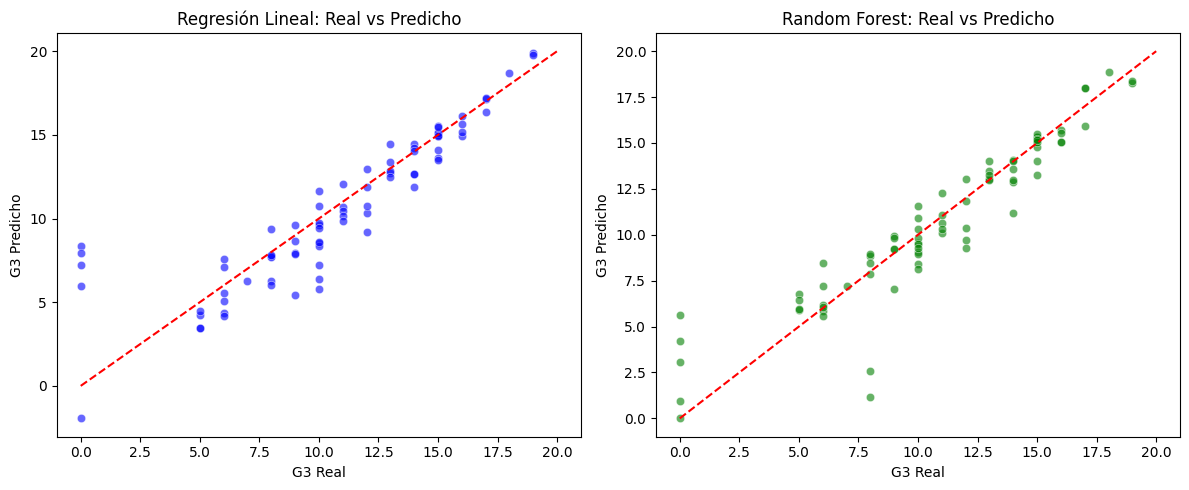

In [12]:
# Graficas de comparación
plt.figure(figsize=(12,5))

# Regresión Lineal
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', alpha=0.6)
plt.plot([0,20],[0,20], 'r--')
plt.title("Regresión Lineal: Real vs Predicho")
plt.xlabel("G3 Real")
plt.ylabel("G3 Predicho")

# Random Forest
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_rf, color='green', alpha=0.6)
plt.plot([0,20],[0,20], 'r--')
plt.title("Random Forest: Real vs Predicho")
plt.xlabel("G3 Real")
plt.ylabel("G3 Predicho")

plt.tight_layout()
plt.show()


## Diseño de Experimentos

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
resultados = []

In [15]:
for test_size in [0.2, 0.3, 0.4]:
    for normalizar in [False, True]:
        for modelo in ["Lineal", "RandomForest"]:

            X = x.copy()
            y = df['G3']

            if normalizar:
                scaler = StandardScaler()
                X[['studytime', 'failures', 'absences','G1', 'G2']] = scaler.fit_transform(X[['studytime', 'failures', 'absences', 'G1', 'G2']])

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

            if modelo == "Lineal":
                mod = LinearRegression()
            else:
                mod = RandomForestRegressor(n_estimators=100, random_state=42)

            mod.fit(X_train, y_train)
            y_pred = mod.predict(X_test)

            mae = mean_absolute_error(y_test, y_pred)
            rmse = sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)

            resultados.append({
                'Modelo': modelo,
                'Normalización': 'Sí' if normalizar else 'No',
                'Test Size': test_size,
                'MAE': mae,
                'RMSE': rmse,
                'R2': r2
            })

df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,Normalización,Test Size,MAE,RMSE,R2
0,Lineal,No,0.2,1.329063,2.110212,0.782834
1,RandomForest,No,0.2,1.057683,1.644297,0.868144
2,Lineal,Sí,0.2,1.329063,2.110212,0.782834
3,RandomForest,Sí,0.2,1.091158,1.678482,0.862604
4,Lineal,No,0.3,1.275442,2.079363,0.803305
5,RandomForest,No,0.3,0.992344,1.615209,0.881317
6,Lineal,Sí,0.3,1.275442,2.079363,0.803305
7,RandomForest,Sí,0.3,1.013826,1.638008,0.877943
8,Lineal,No,0.4,1.254136,2.011668,0.815684
9,RandomForest,No,0.4,1.003287,1.599378,0.883493


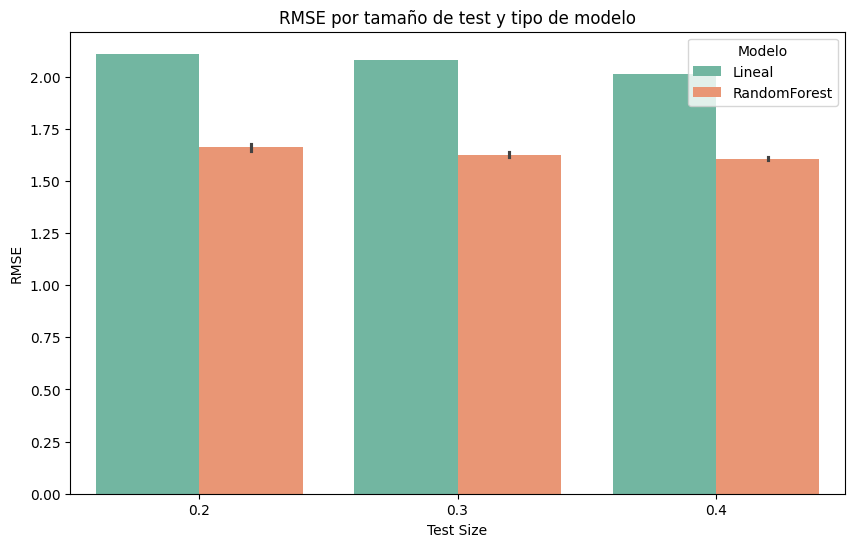

In [16]:
# Gráficas
plt.figure(figsize=(10,6))
sns.barplot(data=df_resultados, x='Test Size', y='RMSE', hue='Modelo', palette='Set2')
plt.title('RMSE por tamaño de test y tipo de modelo')
plt.ylabel('RMSE')
plt.show()

In [17]:
# Mostrar los mejores resultados
print("\n- Mejores configuraciones (por R²) -")
display(df_resultados.sort_values(by='R2', ascending=False))


- Mejores configuraciones (por R²) -


,Modelo,Normalización,Test Size,MAE,RMSE,R2
9,RandomForest,No,0.4,1.003287,1.599378,0.883493
5,RandomForest,No,0.3,0.992344,1.615209,0.881317
11,RandomForest,Sí,0.4,1.026723,1.614910,0.881219
7,RandomForest,Sí,0.3,1.013826,1.638008,0.877943
1,RandomForest,No,0.2,1.057683,1.644297,0.868144
3,RandomForest,Sí,0.2,1.091158,1.678482,0.862604
8,Lineal,No,0.4,1.254136,2.011668,0.815684
10,Lineal,Sí,0.4,1.254136,2.011668,0.815684
6,Lineal,Sí,0.3,1.275442,2.079363,0.803305
4,Lineal,No,0.3,1.275442,2.079363,0.803305


### - **Descripción:**
Se compararon dos modelos de predicción del rendimiento académico (G3) de los estudiantes: Regresión Lineal y Random Forest Regressor.

Se aplicaron las métricas MAE, RMSE y R², junto con un diseño de experimentos factorial que consideró tres factores: tipo de modelo, normalización y tamaño del conjunto de prueba.

Los resultados indican que Random Forest supera al modelo de regresión lineal, obteniendo los menores errores y el mayor coeficiente de determinación (R² ≈ 0.88).

En conclusión, el mejor modelo fue Random Forest sin normalización y con test_size = 0.4, lo que sugiere que puede ser adecuado para predecir las calificaciones finales de los estudiantes en este conjunto de datos.